Passo 1  

Esse notebook realiza o pré-processamento do dataset de 100 trens e, posteriormente, a clusterização deles. Por fim, os clusters e as regras obtidas através de uma decision tree são visualizados.

Importing 

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt#df['Trains'] = range(len(df))

Preprocessing the dataset
- Replacing the strings by numbers
- Replacing empty cells by 0

In [ ]:
df = pd.read_csv("100-trains-uncoded.csv", na_values=[])

replacements = {
    "long": 2, "short": 1,
    "closedblopnrect": 1, "closedrect": 2, "closedtrap": 3,
    "closedushaped": 4, "dblopnrect": 5, "ellipse": 6,
    "hexagon": 7, "jaggedrect": 8, "openrect": 9,
    "opentrap": 10, "slopetopdblopnrect": 11, "slopetoprect": 12,
    "slopetoptrap": 13, "slopetopushaped": 14, "ushaped": 15,
    "circlelod": 1, "hexagonlod": 2, "rectanglod": 3, "trianglod": 4,
    "east": 1, "west": 0
}

columns_to_replace = ['length1', 'length2', 'length3', 'length4',
                      'shape1', 'shape2', 'shape3', 'shape4',
                      'load_shape1', 'load_shape2', 'load_shape3', 'load_shape4',
                      'Class_attribute']

for col in columns_to_replace:
    df[col] = df[col].replace(replacements)

df = df.fillna(0)

df.to_csv("100-trains-coded.csv", index=False)

/tmp/ipykernel_46871/548927301.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(replacements)


Normalizing the dataset

In [ ]:
df = pd.read_csv("100-trains-coded.csv")

scaler = StandardScaler()
data = scaler.fit_transform(df)

data

array([[-0.15171652, -0.30766135, -0.22941573, ..., -0.10050378,
        -0.43643578,  1.        ],
       [-0.15171652, -0.30766135, -0.22941573, ..., -0.10050378,
        -0.43643578,  1.        ],
       [-0.15171652,  1.15739269, -0.22941573, ..., -0.10050378,
        -0.43643578,  1.        ],
       ...,
       [-1.41602086, -0.30766135, -0.22941573, ..., -0.10050378,
        -0.43643578, -1.        ],
       [-1.41602086, -1.77271539, -0.22941573, ..., -0.10050378,
        -0.43643578, -1.        ],
       [-0.15171652,  1.15739269, -0.22941573, ..., -0.10050378,
        -0.43643578, -1.        ]])

Elbow Method

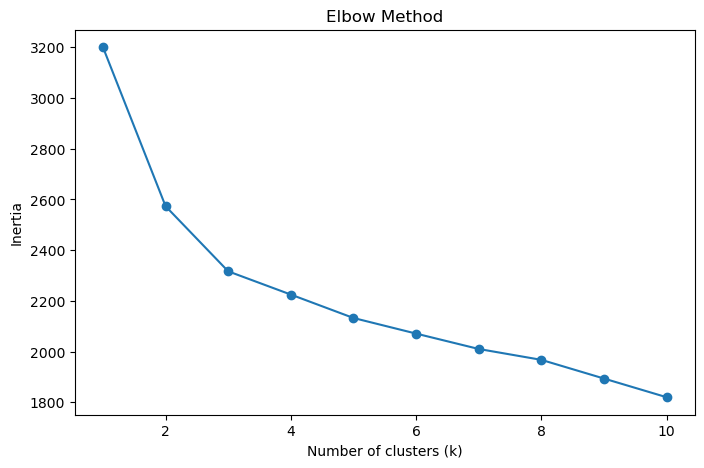

In [12]:
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

K-means

In [52]:
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(data)

df['Cluster'] = clusters


Using PCA to visualize the clusters

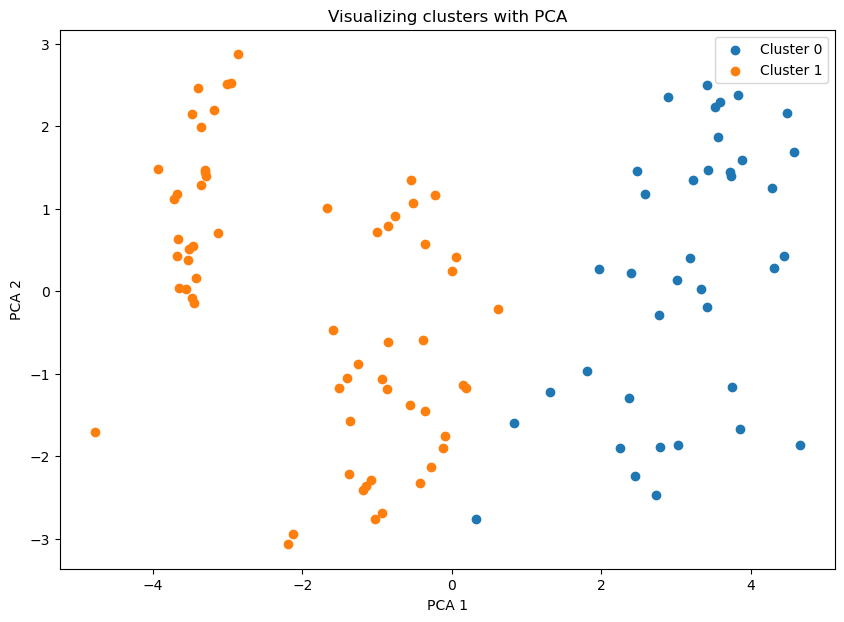

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(10, 7))
for cluster_id in range(k):
    plt.scatter(data_pca[clusters == cluster_id, 0], 
                data_pca[clusters == cluster_id, 1], label=f'Cluster {cluster_id}')

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualizing clusters with PCA")
plt.legend()
plt.show()


Using t-SNE to visualize the clusters

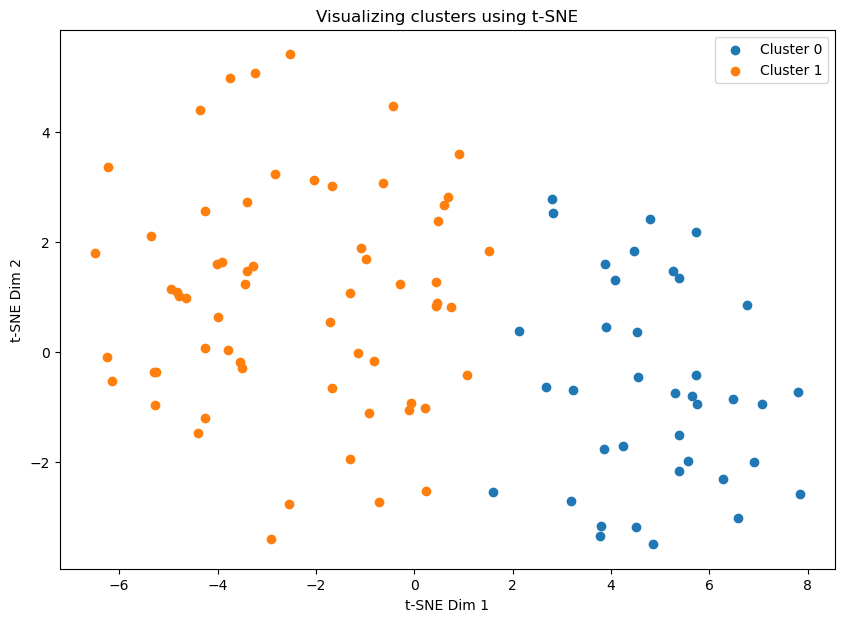

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

plt.figure(figsize=(10, 7))
for cluster_id in range(k):
    plt.scatter(data_tsne[clusters == cluster_id, 0], 
                data_tsne[clusters == cluster_id, 1], label=f'Cluster {cluster_id}')

plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.title("Visualizing clusters using t-SNE")
plt.legend()
plt.show()

In [55]:

print(df.groupby('Cluster').mean())


         Number_of_cars  Number_of_different_loads  num_wheels1   length1  \
Cluster                                                                     
0              5.000000                   2.500000     2.026316  1.078947   
1              3.580645                   2.032258     2.064516  1.145161   

           shape1  num_loads1  load_shape1  num_wheels2   length2    shape2  \
Cluster                                                                       
0        8.894737    1.078947     2.710526     2.105263  1.263158  8.684211   
1        8.209677    1.145161     2.290323     2.193548  1.274194  7.806452   

         ...  Rectangle_next_to_triangle  Rectangle_next_to_hexagon  \
Cluster  ...                                                          
0        ...                    0.552632                   0.026316   
1        ...                    0.241935                   0.064516   

         Rectangle_next_to_circle  Triangle_next_to_triangle  \
Cluster                  

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [63]:
cluster_0 = df[df['Cluster'] == 0]
cluster_0


,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Cluster
3,5,3.0,2,1,10,1.0,1.0,2,1,15,1.0,4.0,2.0,2.0,9.0,3.0,3.0,2.0,1.0,9.0,1.0,3.0,1,1,0,0,0,0,1,0,0,0,1,0
6,5,3.0,2,1,9,1.0,4.0,2,1,15,1.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,0,1,0,1,0,0,0,0,0,0,1,0
8,5,3.0,2,1,9,1.0,1.0,2,1,10,1.0,1.0,3.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,2.0,3.0,0,1,0,1,0,0,0,0,0,1,1,0
10,5,2.0,2,1,15,1.0,4.0,3,2,9,3.0,3.0,2.0,1.0,3.0,1.0,4.0,2.0,1.0,9.0,1.0,4.0,0,1,0,0,1,0,0,0,0,0,1,0
11,5,2.0,2,1,6,1.0,3.0,2,1,9,1.0,3.0,2.0,1.0,10.0,1.0,3.0,2.0,1.0,15.0,2.0,4.0,1,1,0,0,0,0,0,0,0,0,1,0
13,5,3.0,2,1,11,1.0,1.0,2,1,9,1.0,4.0,2.0,1.0,9.0,1.0,4.0,2.0,2.0,8.0,1.0,3.0,0,1,0,0,1,0,1,0,0,0,1,0
16,5,3.0,2,2,2,1.0,3.0,2,1,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,15.0,1.0,4.0,0,0,0,1,0,0,1,0,0,1,1,0
17,5,3.0,2,1,15,1.0,3.0,2,2,9,3.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,10.0,1.0,4.0,1,1,0,0,0,0,0,0,0,0,1,0
23,5,2.0,2,1,9,1.0,4.0,2,1,9,1.0,4.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,9.0,1.0,1.0,0,0,0,0,1,0,1,0,0,1,1,0
24,5,2.0,2,1,12,1.0,3.0,2,1,15,1.0,1.0,2.0,2.0,9.0,2.0,1.0,2.0,2.0,8.0,1.0,1.0,0,0,0,1,0,0,0,0,0,1,1,0


In [64]:
cluster_1 = df[df['Cluster'] == 1]
cluster_1


,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Cluster
0,4,2.0,2,2,9,1.0,3.0,2,1,9,1.0,4.0,2.0,2.0,2.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,1
1,4,2.0,2,1,9,2.0,1.0,2,1,3,1.0,3.0,2.0,1.0,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,1
2,4,3.0,2,1,15,1.0,4.0,2,1,9,1.0,3.0,2.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,1,1
4,4,3.0,2,1,2,1.0,4.0,2,1,3,1.0,1.0,2.0,1.0,15.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,1,1
5,4,1.0,2,1,10,2.0,1.0,2,1,10,1.0,1.0,2.0,1.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,1,1
7,3,2.0,2,1,1,1.0,3.0,2,1,15,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,1
9,3,2.0,2,1,15,1.0,1.0,3,2,9,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,1,1
12,3,2.0,2,1,15,1.0,1.0,2,1,6,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1
14,3,2.0,2,1,10,1.0,3.0,2,1,15,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,1
15,3,2.0,2,1,9,1.0,4.0,2,1,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,1,1


Extracting rules

|--- Rectangle_next_to_triangle <= 0.50
|   |--- shape1 <= 8.50
|   |   |--- Number_of_different_loads <= 2.50
|   |   |   |--- load_shape1 <= 1.50
|   |   |   |   |--- shape1 <= 4.00
|   |   |   |   |   |--- length1 <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- length1 >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- shape1 >  4.00
|   |   |   |   |   |--- length2 <= 1.50
|   |   |   |   |   |   |--- shape4 <= 7.50
|   |   |   |   |   |   |   |--- shape1 <= 6.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- shape1 >  6.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- shape4 >  7.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- length2 >  1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- load_shape1 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- Number_of_different_loads >  2.50
|   |   |   |--- num_wheels1 <= 2.50
|   |   |   |   |--- class: 1
|  

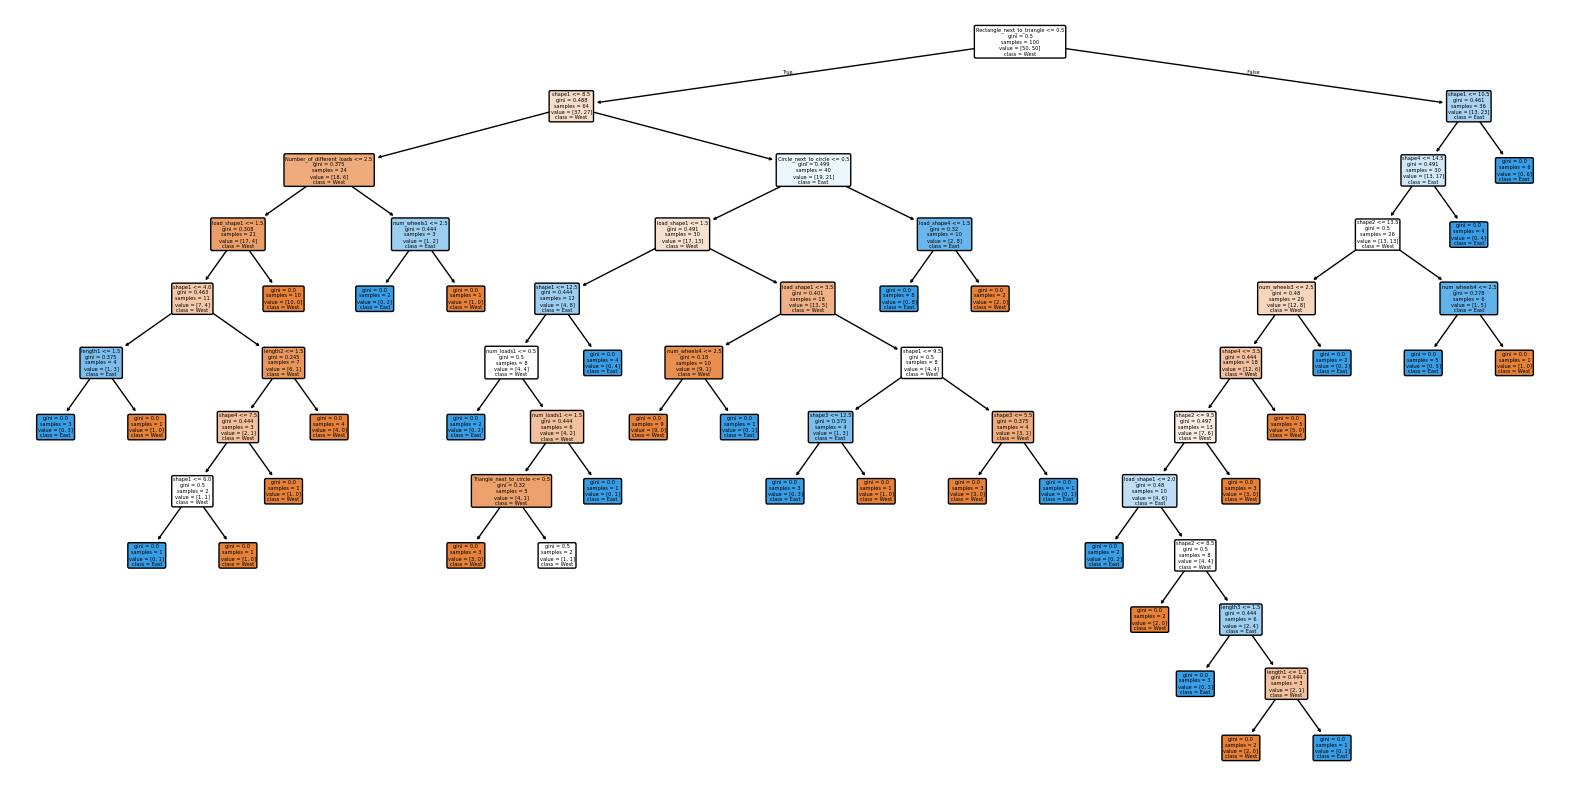

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import plot_tree

Y = data
Y = df.drop(columns=['Class_attribute'])
z = df['Class_attribute']

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(Y, z)

rules = export_text(tree_model, feature_names=Y.columns.tolist())
print(rules)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=Y.columns.tolist(), class_names=['West', 'East'], rounded=True)
plt.show()
